In [1]:
#Import dataset
import pandas as pd
df = pd.read_csv(r"Churn_customers.csv")
df.drop("RowNumber",axis=1,inplace = True)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
df.info()

#12 colonne, 10000 righe, non ho NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


# Feature investigation

In [3]:
features = ['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']

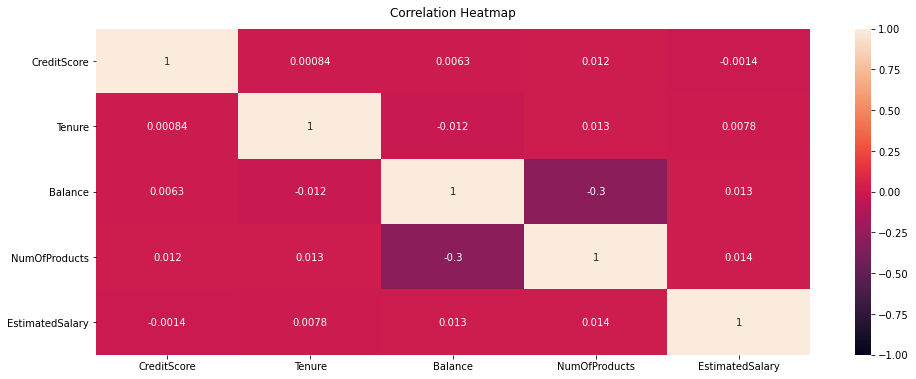

In [4]:
#Correlation matrix to understand if some variables are redundant

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.loc[:,features].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
#No significant correlation value is shown

In [5]:
#VIF of some variables to understand if a variable can be explained by the combination of the others

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.loc[:,features].values, i)
                          for i in range(len(features))]
  
print(vif_data)

           feature        VIF
0      CreditScore  13.379999
1           Tenure   3.821459
2          Balance   2.576045
3    NumOfProducts   7.478597
4  EstimatedSalary   3.853690


In [6]:
#High value for Credit score, this means that this variable is redundant

In [7]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
print(df['Exited'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')
#The 2 classes are not balance and this may interfere with the performances of the classification algorithms

0    79.6%
1    20.4%
Name: Exited, dtype: object


In [9]:
print(df.groupby('Exited').size())

Exited
0    7963
1    2037
dtype: int64


In [110]:
df.describe(exclude= ['O']) # Describe all numerical columns


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [111]:
df.describe(include = ['O']) # Describe all categorical columns
#Vedo che non ci sono 10000 cognomi diversi, magari ho omonimi

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [114]:
len(df['CustomerId'].unique()) #each row is associated to a different customer ID

10000

In [17]:
#Downsampling to overcome the problem of not balanced classes

In [16]:
from sklearn.utils import resample

#Down-sample Majority Class
df_majority = df[df.Exited==0] 
df_minority = df[df.Exited==1] 
 
df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=4000,     # number of samples into the minority class 
                                   random_state=123)  

 
#3) Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
#4) Display new class counts
df_downsampled.Exited.value_counts() 


0    4000
1    2037
Name: Exited, dtype: int64

In [20]:
print(df_downsampled['Exited'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')

0    66.3%
1    33.7%
Name: Exited, dtype: object


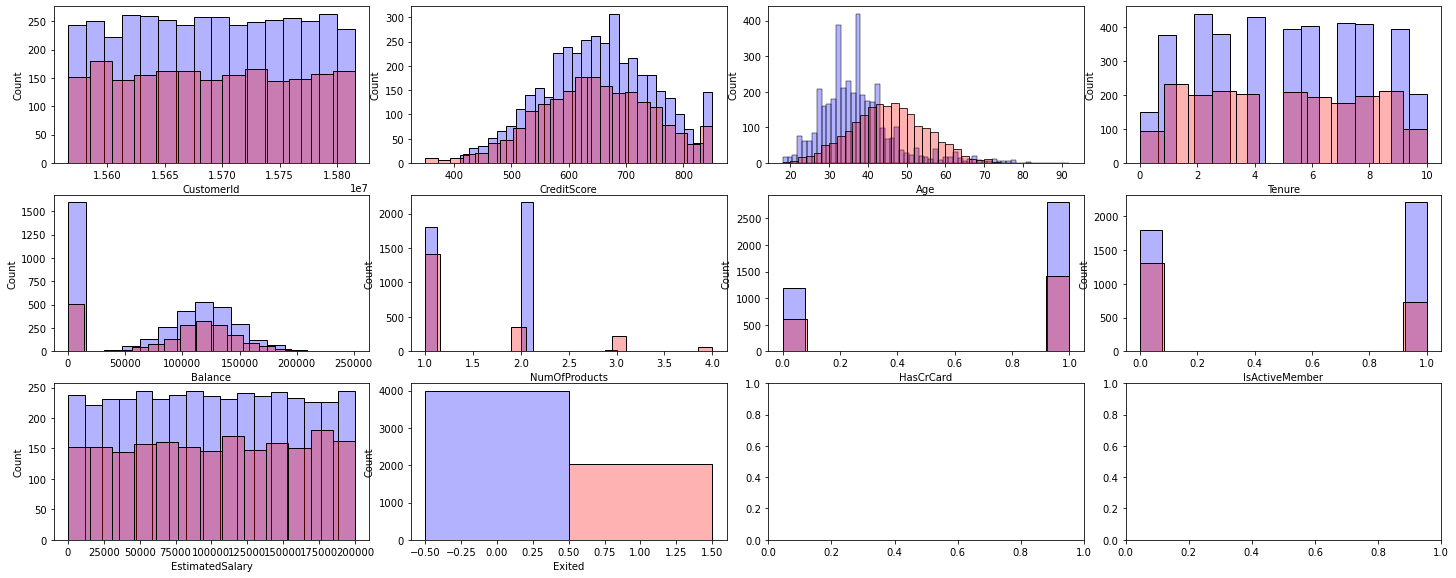

In [18]:
#Plot the distribution of the target variable Exited among the other variables to get interesting insights

import numpy as np
df_num = df_downsampled.select_dtypes(include=np.number)
%matplotlib inline

X0 = df_num[df_num['Exited']==0]
X1 = df_num[df_num['Exited']==1]

fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20,8))
fig.tight_layout()
#sns.histplot(df0.loc[:,i], ax=ax, element="bars",  alpha=0.3, color="blue")

for i, ax in zip(range(df_num.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], ax=ax, element="bars",  alpha=0.3, color="blue")
    sns.histplot(X1.iloc[:,i], ax=ax, element="bars",  alpha=0.3, color="red")
plt.show()

#Credit Score: Few observations with credit scores below 400 and they are all churners
#Age: It seems that the average age of non-Churners is lower than Churners, but if the elderly over 75 are taken into account, they are all non-Churners
#Tenure does not seem to be important for discrimination
#For balance interesting behaviour when it is 0
#Num products interesting behaviour when equal to 2
#It seems that the variable Estimated salary is not decisive

In [144]:
#Distribution of classes 0 and 1 (Exited) considering some rows associated to different variables

print('Low balance')
print(df_downsampled[df_downsampled['Balance']<500]['Exited'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')
print('High balance')
print(df_downsampled[df_downsampled['Balance']>19000]['Exited'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')
print('Num sold products = 2')
print(df_downsampled[df_downsampled['NumOfProducts']==2]['Exited'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')
print('Num sold products = 3')
print(df_downsampled[df_downsampled['NumOfProducts']==3]['Exited'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')
print('Num sold products = 4')
print(df_downsampled[df_downsampled['NumOfProducts']==4]['Exited'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')

Low balance
0    76.1%
1    23.9%
Name: Exited, dtype: object
High balance
0    61.0%
1    39.0%
Name: Exited, dtype: object
Num sold products = 2
0    86.1%
1    13.9%
Name: Exited, dtype: object
Num sold products = 3
1    90.2%
0     9.8%
Name: Exited, dtype: object
Num sold products = 4
1    100.0%
Name: Exited, dtype: object


In [ ]:
#When the balance is low, the proportion of non-churn increases compared to the proportion considering the whole dataset
#When the balance is high, the proportion of non-churn is roughly the same with respect to the total dataset
#When the number of products sold is 2 most likely the customer will not churna, but when the number of products becomes greater
#than 3 the probability of churn is very high


In [145]:
#Mean of the column 'Exited' considering the Geography variable

df_downsampled.groupby(['Geography']).agg({'CustomerId':'count', 'Exited':'mean'}
                                  ).reset_index()

#Considering Germany the proportion of churners is quite high

,Geography,CustomerId,Exited
0,France,2934,0.276074
1,Germany,1658,0.490953
2,Spain,1445,0.285813


In [125]:
#Mean of the column 'Exited' considering the NumOfProducts variable

df_downsampled.groupby(['NumOfProducts']).agg({'CustomerId':'count', 'Exited':'mean'}
                                  ).reset_index()

#When the number of products is = 2 the proportion of churners is low, but when the number of products is higher than 3 the 
#probability to have a churner is quite high

,NumOfProducts,CustomerId,Exited
0,1,3221,0.437442
1,2,2512,0.138535
2,3,244,0.901639
3,4,60,1.000000


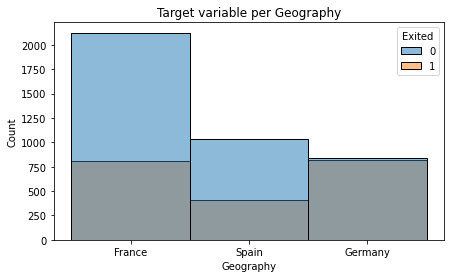

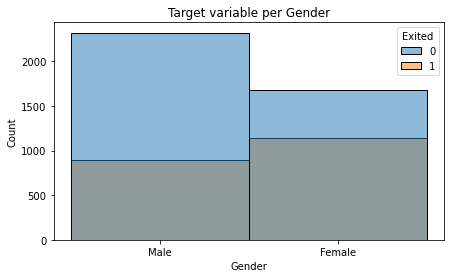

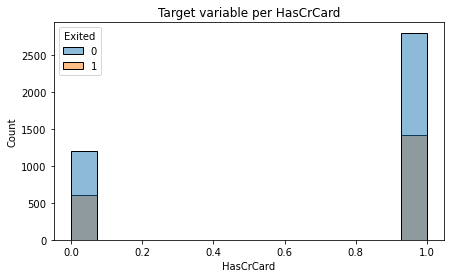

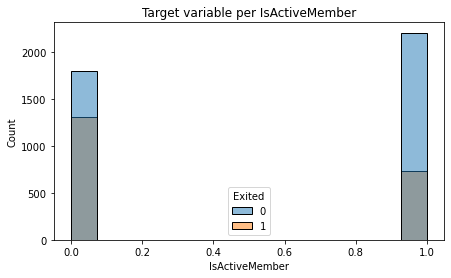

In [21]:
#Boxplot for the levels of the categorical variables with the target variable

import seaborn as sns

array = ['Geography','Gender','HasCrCard','IsActiveMember']
for i in array:
  plt.figure(figsize=(7,4))
  sns.histplot(data=df_downsampled, x=i, hue="Exited")
  #plt.ylim(0, 30000)
  plt.title("Target variable per" + " " + i)

# Feature selection

In [22]:
#Delete Credit Score because it has a very high VIF
df_new = df_downsampled.copy()
df_new.drop('CreditScore',axis=1,inplace = True)

In [23]:
df_new.columns

Index(['CustomerId', 'Surname', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
#Delete ID and Surname because they are not relevant for classification
df_new.drop('CustomerId',axis=1,inplace = True)
df_new.drop('Surname',axis=1,inplace = True)

In [25]:
#Drop Has Card because it is not relevant for discrimantion purposes between churners and not churners

df_new.drop('HasCrCard',axis=1,inplace = True)

# Outlier detection

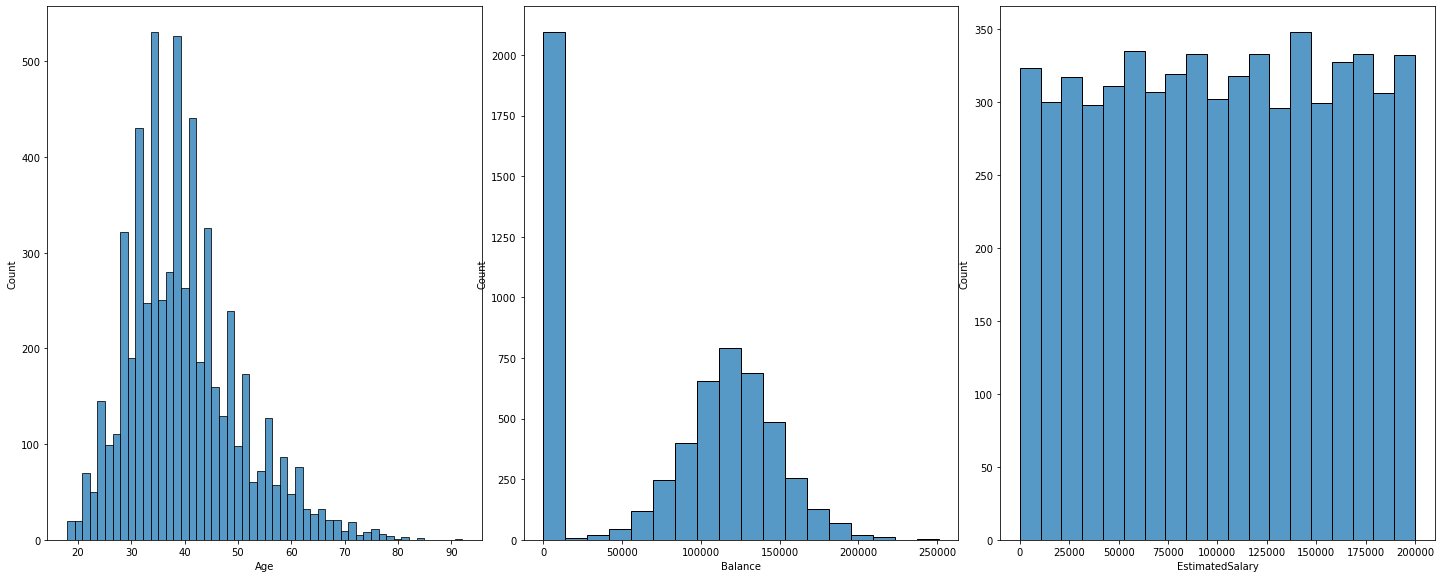

In [26]:
var=['Age','Balance','EstimatedSalary']

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20,8))
fig.tight_layout()

for i, ax in zip(var, axes.flat):
    sns.histplot(df_new.loc[:,i], ax=ax)
plt.show()

In [27]:
#BoxCox to make the variable Age normal and then consider the 3 sigma method to drop the outliers

from scipy import stats
trasf_age,lambda_age = stats.boxcox(df_new['Age'])
trasf_age

array([3.19049081, 3.14530889, 3.77550551, ..., 3.49177497, 3.19049081,
       3.31149397])

In [28]:
#Not possible to have a normal distribution as it is shown by the p-value of the shapiro test

import math
from scipy.stats import shapiro 
shapiro(trasf_age)

C:\Users\13-U005NL\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.997718334197998, pvalue=7.655934552985855e-08)

In [30]:
#Consider just some rows for the varibale 'Balance' 

part_balance = df_new['Balance'][df_new['Balance']>10000]
len(part_balance)

3942

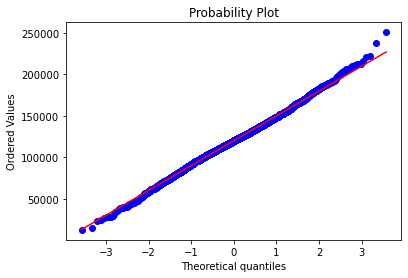

In [33]:
#when balance is higher than 10000 it seems to have a normal distribution as it is shown by the q-qplot
stats.probplot(part_balance, dist="norm", plot=plt)
plt.show()

In [36]:
#identify the outliers using the 3 sigma method
outliers_balance = [item for item in part_balance if item >= part_balance.mean()+3*part_balance.std()]

In [37]:
outliers_balance

[221532.8,
 212778.2,
 212692.97,
 213146.2,
 211774.31,
 250898.09,
 238387.56,
 216109.88,
 210433.08,
 222267.63]

In [38]:
#save the indexes of the dataset associated to the outliers
list_outliers = df_new[df_new['Balance'].isin(outliers_balance)].index

In [40]:
list_outliers=list(list_outliers)
list_outliers

[3588, 1533, 2709, 138, 520, 2092, 3280, 6717, 7353, 8733]

In [52]:
#Save the indexes of the dataset associated to the rows of the column Age higher than the 99 quantile
import numpy as np
lista2=[]
a,b = (np.quantile((df_new['Age']),[0.01,0.99]))
lista2.append(df_new[df_new.loc[:,'Age']>=b].index)

flat_list = [item for sublist in lista2 for item in sublist] 
print(len(flat_list))
print(flat_list)


69
[2164, 3396, 6167, 2002, 9490, 7194, 602, 6116, 5490, 9734, 969, 2778, 9936, 9894, 3378, 4931, 9080, 4501, 3499, 6278, 9425, 85, 158, 7063, 7788, 4256, 7692, 6721, 7362, 5957, 6173, 4832, 8686, 4801, 7243, 1866, 3387, 3826, 9380, 1205, 9589, 9671, 9292, 4162, 2108, 3382, 4590, 6759, 6530, 230, 1614, 7956, 888, 5508, 1410, 2553, 3110, 3317, 3531, 3646, 3910, 4463, 5664, 6581, 7058, 7499, 8488, 9555, 9646]


In [53]:
#Concatenate the 2 lists of the outliers in Age and Balance variables

Outliers = flat_list+list_outliers

In [54]:
Outliers = list(set(Outliers)) 
df_new.loc[Outliers] 

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
3588,Spain,Male,40,3,221532.80,1,0,171867.08,0
9734,Germany,Male,70,3,77356.92,2,1,20881.96,0
520,France,Female,35,1,211774.31,1,0,188574.12,1
7692,Germany,Male,74,5,108891.70,1,0,10078.02,0
6167,Spain,Male,75,7,126273.95,1,1,91673.60,0
...,...,...,...,...,...,...,...,...,...
6116,France,Male,73,0,146329.73,1,1,43615.67,0
8686,France,Female,71,8,0.00,2,1,169741.96,0
4590,France,Female,78,6,47536.40,1,1,119400.08,0
2553,Spain,Male,71,8,0.00,1,1,198446.91,1


In [55]:
#Create a new dataset without the outliers

df_new2 = df_new.copy()
df_new2.drop(Outliers, axis=0, inplace=True)

In [56]:
df_new2=df_new2.reset_index()
df_new2

,index,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,1183,France,Male,36,1,0.00,2,1,151314.98,0
1,4245,France,Female,34,8,122338.43,2,0,187985.85,0
2,6301,Germany,Female,45,6,97652.96,1,0,127332.33,0
3,4740,France,Male,30,6,103804.97,1,1,125710.53,0
4,5441,France,Male,29,1,135536.50,1,0,66825.33,0
...,...,...,...,...,...,...,...,...,...,...
5953,9981,Germany,Male,42,3,152039.70,1,1,53445.17,1
5954,9982,Germany,Female,46,7,137145.12,1,0,115146.40,1
5955,9991,France,Female,53,4,88381.21,1,0,69384.71,1
5956,9997,France,Female,36,7,0.00,1,1,42085.58,1


In [57]:
df_new2.drop('index',axis = 1, inplace = True)
df_new2

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,France,Male,36,1,0.00,2,1,151314.98,0
1,France,Female,34,8,122338.43,2,0,187985.85,0
2,Germany,Female,45,6,97652.96,1,0,127332.33,0
3,France,Male,30,6,103804.97,1,1,125710.53,0
4,France,Male,29,1,135536.50,1,0,66825.33,0
...,...,...,...,...,...,...,...,...,...
5953,Germany,Male,42,3,152039.70,1,1,53445.17,1
5954,Germany,Female,46,7,137145.12,1,0,115146.40,1
5955,France,Female,53,4,88381.21,1,0,69384.71,1
5956,France,Female,36,7,0.00,1,1,42085.58,1


C:\Users\13-U005NL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\13-U005NL\

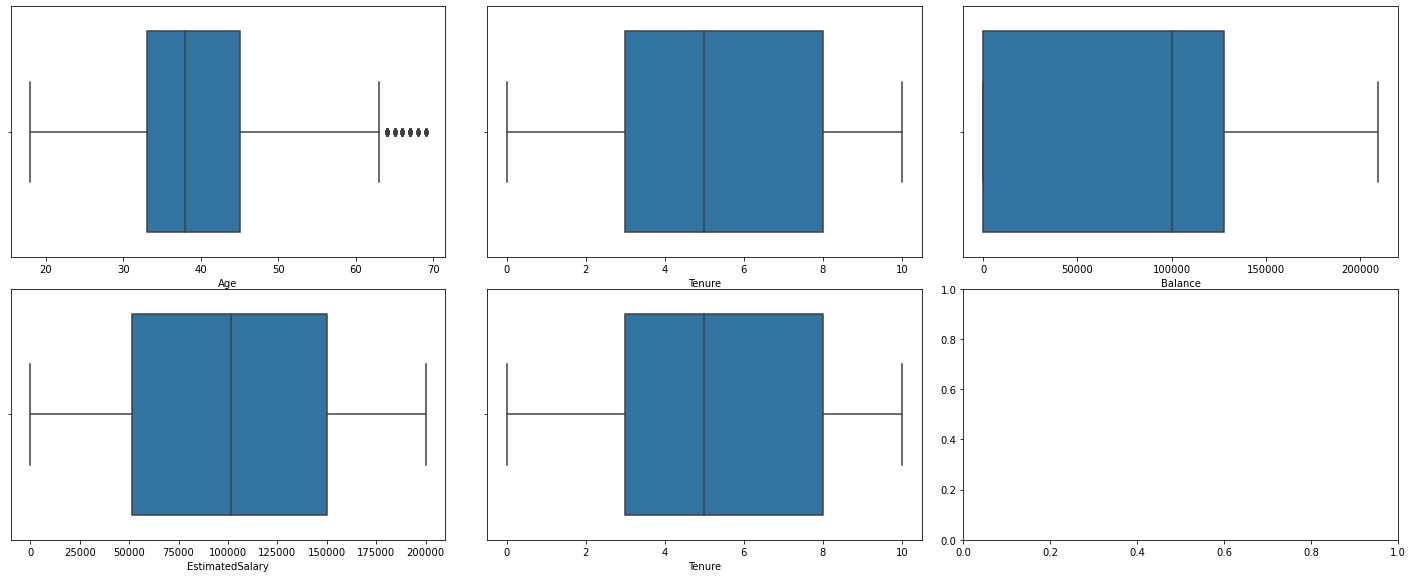

In [59]:
var= ['Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Tenure']

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,8))
fig.tight_layout()

for i, ax in zip(var, axes.flat):
    sns.boxplot(df_new2.loc[:,i], ax=ax)
plt.show()

# Categorical variables

In [60]:
#Creation of a dataframe with just the dummy variables 

dummies=pd.get_dummies(df_new2[['Gender','Geography']],drop_first=True)
dummies

,Gender_Male,Geography_Germany,Geography_Spain
0,1,0,0
1,0,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5953,1,1,0
5954,0,1,0
5955,0,0,0
5956,0,0,0


# Normalize features

In [61]:
df_new2.columns

Index(['Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [62]:
#Dataset with the variables to scale

df_toscale=df_new2[['Age','Tenure','Balance','EstimatedSalary','NumOfProducts']]

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_toscale)  #Adoption of the Standard Scaler
df_scaled = pd.DataFrame(scaler.transform(df_toscale))  #creation of the scaled dataframe
df_scaled.columns = df_toscale.columns


df_scaled.head()

,Age,Tenure,Balance,EstimatedSalary,NumOfProducts
0,-0.363090,-1.391491,-1.265653,0.878523,0.757121
1,-0.568249,1.029296,0.712315,1.514524,0.757121
2,0.560122,0.337643,0.313200,0.462580,-0.843634
3,-0.978565,0.337643,0.412666,0.434452,-0.843634
4,-1.081144,-1.391491,0.925701,-0.586824,-0.843634


<AxesSubplot:>

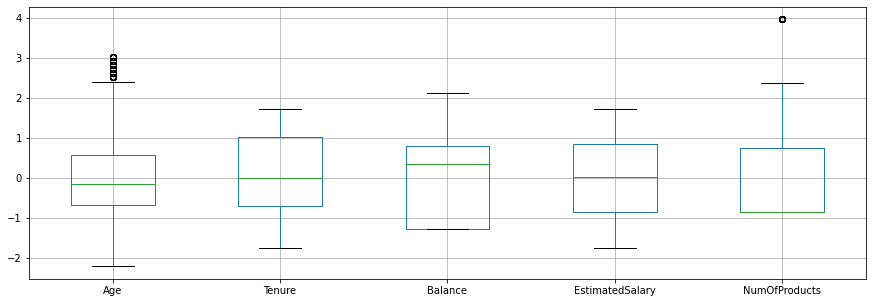

In [64]:
#Boxplot with all variables

%matplotlib inline
df_scaled.boxplot(figsize = (15,5))

In [65]:
#Concatenate
df_final=pd.concat([df_scaled,dummies,df_new2.loc[:,['IsActiveMember','Exited']]], axis = 1)
df_final

,Age,Tenure,Balance,EstimatedSalary,NumOfProducts,Gender_Male,Geography_Germany,Geography_Spain,IsActiveMember,Exited
0,-0.363090,-1.391491,-1.265653,0.878523,0.757121,1,0,0,1,0
1,-0.568249,1.029296,0.712315,1.514524,0.757121,0,0,0,0,0
2,0.560122,0.337643,0.313200,0.462580,-0.843634,0,1,0,0,0
3,-0.978565,0.337643,0.412666,0.434452,-0.843634,1,0,0,1,0
4,-1.081144,-1.391491,0.925701,-0.586824,-0.843634,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5953,0.252385,-0.699838,1.192525,-0.818883,-0.843634,1,1,0,1,1
5954,0.662701,0.683469,0.951709,0.251233,-0.843634,0,1,0,0,1
5955,1.380755,-0.354011,0.163294,-0.542436,-0.843634,0,0,0,0,1
5956,-0.363090,0.683469,-1.265653,-1.015898,-0.843634,0,0,0,1,1


# Modelization 

In [66]:
Y = df_final.iloc[:,-1]
Y

0       0
1       0
2       0
3       0
4       0
       ..
5953    1
5954    1
5955    1
5956    1
5957    1
Name: Exited, Length: 5958, dtype: int64

In [67]:
X = df_final.iloc[:,:-1]
X

,Age,Tenure,Balance,EstimatedSalary,NumOfProducts,Gender_Male,Geography_Germany,Geography_Spain,IsActiveMember
0,-0.363090,-1.391491,-1.265653,0.878523,0.757121,1,0,0,1
1,-0.568249,1.029296,0.712315,1.514524,0.757121,0,0,0,0
2,0.560122,0.337643,0.313200,0.462580,-0.843634,0,1,0,0
3,-0.978565,0.337643,0.412666,0.434452,-0.843634,1,0,0,1
4,-1.081144,-1.391491,0.925701,-0.586824,-0.843634,1,0,0,0
...,...,...,...,...,...,...,...,...,...
5953,0.252385,-0.699838,1.192525,-0.818883,-0.843634,1,1,0,1
5954,0.662701,0.683469,0.951709,0.251233,-0.843634,0,1,0,0
5955,1.380755,-0.354011,0.163294,-0.542436,-0.843634,0,0,0,0
5956,-0.363090,0.683469,-1.265653,-1.015898,-0.843634,0,0,0,1


In [69]:
#split the data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size =0.3, 
                                                    
                                                    stratify=Y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)
print(X_test.shape)

(4170, 9)
(1788, 9)


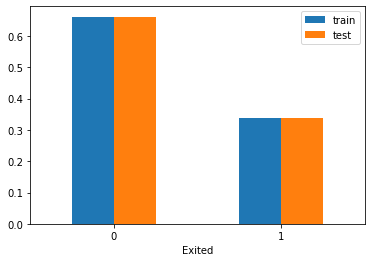

In [70]:
import pandas as pd
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) 

# Tree

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [84]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [5,8,10,12,15],
              'min_samples_split': [10,15,18,20],
              'min_samples_leaf': [15,17,20,25]}

#Definition of the grid search to select the best algorithm
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=4, scoring = 'f1', verbose=0, n_jobs=-1) #4 folds cross validation and select the best model
    #according to f1 metric
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    #A grid search function is created because it will be used a lot of times
    
    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1      train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
    print("accuracy  train %.3f   test %.3f" % (accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred) ))
    print("recall  train %.3f   test %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred) ))
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',cmap="Blues", ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

f1_train: 0.672763 using {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 20, 'min_samples_split': 15}
f1      train 0.738   test 0.684
precision  train 0.801   test 0.760
accuracy  train 0.836   test 0.805
recall  train 0.684   test 0.621


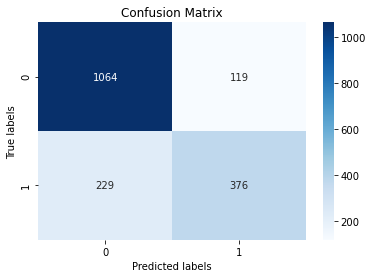

In [85]:
hyperp_search(classifier,parameters)

In [94]:
#Save the variables of interest
treemodel = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=20, min_samples_split=15)
treemodel.fit(X_train, y_train)
y_pred = treemodel.predict(X_test)
y_pred_train = treemodel.predict(X_train)
filepath = r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2tree_model.pkl'
pickle.dump(treemodel, open(filepath, 'wb'))
filepath = r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2treey_pred_train.pkl'
pickle.dump(y_pred_train , open(filepath, 'wb'))
filepath = r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2treey_pred.pkl'
pickle.dump(y_pred, open(filepath, 'wb'))

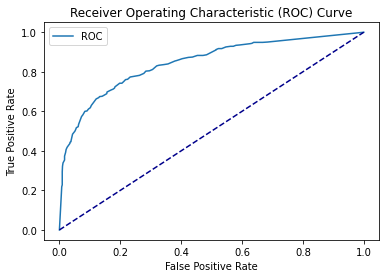

AUC: 0.85


In [95]:
#Roc curve function definition 

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr_tree,tpr_tree=roc(model_tree,X_train,y_train,X_test,y_test)

In [96]:
#Save
pickle.dump(fpr_tree, open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2tree_fpr.pkl', 'wb'))
pickle.dump(tpr_tree, open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2tree_tpr.pkl', 'wb'))


# Logistic regression

f1_train: 0.561104 using {'C': 5, 'max_iter': 10000}
f1      train 0.563   test 0.562
precision  train 0.688   test 0.671
accuracy  train 0.750   test 0.745
recall  train 0.477   test 0.483


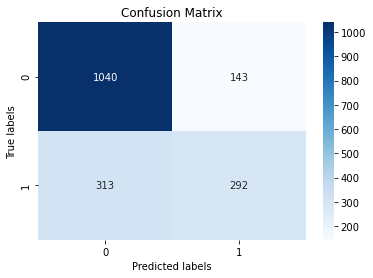

In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
parameters = {"C":[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,6,7,10,15], "max_iter":[10000]}


hyperp_search(classifier,parameters)

# Random forest

f1_train: 0.685488 using {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 40}
f1      train 0.715   test 0.679
precision  train 0.841   test 0.808
accuracy  train 0.832   test 0.813
recall  train 0.621   test 0.585


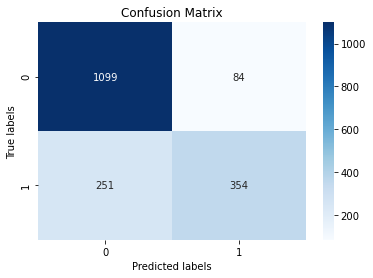

In [91]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
parameters = {'n_estimators' : [40,50,80,100],
              'criterion': ['entropy','gini'], 
              'max_depth': [5,7,8,10],
              'min_samples_split': [15,20,35],
              'min_samples_leaf': [10,15,20]}

hyperp_search(classifier,parameters)

In [97]:
#Save
model_randomforest=RandomForestClassifier(n_estimators=40,criterion='entropy',max_depth=10,min_samples_leaf=15,min_samples_split=15)
model_randomforest.fit(X_train, y_train)
y_pred =model_randomforest.predict(X_test)
y_pred_train = model_randomforest.predict(X_train)

filepath = r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2rf_model.pkl'
pickle.dump(model_randomforest, open(filepath, 'wb'))
filepath = r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2rfy_pred_train.pkl'
pickle.dump(y_pred_train, open(filepath, 'wb'))
filepath = r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2rfy_pred.pkl'
pickle.dump(y_pred, open(filepath, 'wb'))



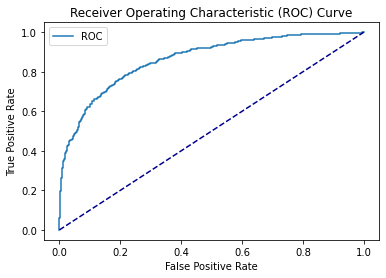

AUC: 0.86


In [98]:
fpr_RF,tpr_RF=roc(model_randomforest,X_train,y_train,X_test,y_test)

In [99]:
#Save
pickle.dump(fpr_RF, open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2rf_fpr.pkl', 'wb'))
pickle.dump(tpr_RF, open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2rf_tpr.pkl', 'wb'))

# MLP

f1_train: 0.695390 using {'activation': 'logistic', 'alpha': 0.0007, 'hidden_layer_sizes': (25, 10, 8), 'max_iter': 4000}
f1      train 0.704   test 0.665
precision  train 0.820   test 0.783
accuracy  train 0.824   test 0.803
recall  train 0.616   test 0.579


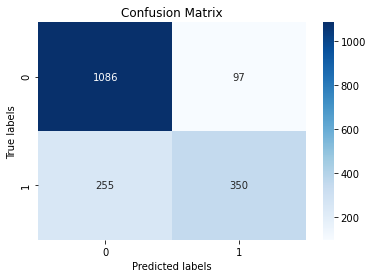

In [100]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(25,10,8),(15,10,5)],  "max_iter": [3500,4000], "alpha": [0.0007,0.001, 0.005],'activation':['logistic','relu']}
hyperp_search(classifier,parameters)

In [101]:
#Save
model_MLP=MLPClassifier(alpha=0.0007, hidden_layer_sizes= (25,10,8), max_iter= 4000, activation='logistic')

model_MLP.fit(X_train, y_train)
y_pred =model_MLP.predict(X_test)
y_pred_train = model_MLP.predict(X_train)

filepath = r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2mlp_model.pkl'
pickle.dump(model_MLP, open(filepath, 'wb'))
filepath = r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2mlpy_pred_train.pkl'
pickle.dump(y_pred_train, open(filepath, 'wb'))
filepath = r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2mlpy_pred.pkl'
pickle.dump(y_pred, open(filepath, 'wb'))

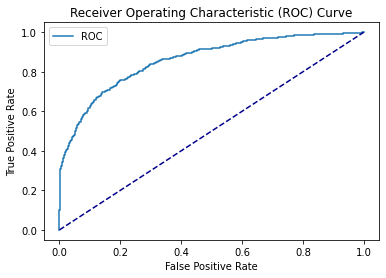

AUC: 0.86


In [103]:
fpr_MLP,tpr_MLP=roc(model_MLP,X_train,y_train,X_test,y_test)

In [104]:
#Save
pickle.dump(fpr_MLP, open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2mlp_fpr.pkl', 'wb'))
pickle.dump(tpr_MLP, open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2mlp_tpr.pkl', 'wb'))

# Adaboost

f1_train: 0.687772 using {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=7), 'learning_rate': 0.15, 'n_estimators': 80}
f1      train 0.770   test 0.670
precision  train 0.854   test 0.763
accuracy  train 0.859   test 0.801
recall  train 0.701   test 0.597


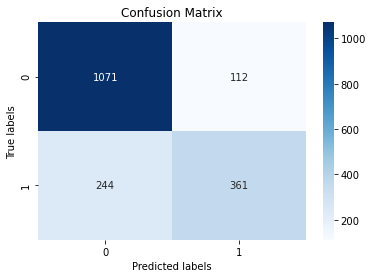

In [130]:

from sklearn.ensemble import AdaBoostClassifier

classifier= AdaBoostClassifier()
parameters = {'n_estimators' : [80],
     'base_estimator': [DecisionTreeClassifier(max_depth=(7)),LogisticRegression()], 'algorithm' :['SAMME'],
              'learning_rate' : [0.15,0.2,1]}

hyperp_search(classifier,parameters)

# Bagging 

In [132]:
#Bagging with MLP classifiers

from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier

bagging = BaggingClassifier(MLPClassifier(),n_estimators=80,
                            max_samples=0.5, max_features=0.8)
bagging.fit(X_train, y_train)

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

BaggingClassifier(base_estimator=MLPClassifier(), max_features=0.8,
                  max_samples=0.5, n_estimators=80)

In [133]:
y_pred = bagging.predict(X_test)
y_pred_train = bagging.predict(X_train)

In [137]:
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score


print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, y_pred_train))
print("recall_score: ", recall_score(y_train, y_pred_train))
print("precision_score: ", precision_score(y_train, y_pred_train))
print("accuracy_score: ", accuracy_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("precision_score: ", precision_score(y_test, y_pred))
print("accuracy_score: ", accuracy_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6910602910602911
recall_score:  0.5893617021276596
precision_score:  0.8351758793969849
accuracy_score:  0.8218225419664269
--
***RESULTS ON TEST SET***
f1_score:  0.6601752677702045
recall_score:  0.5603305785123966
precision_score:  0.8033175355450237
accuracy_score:  0.8048098434004475


C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

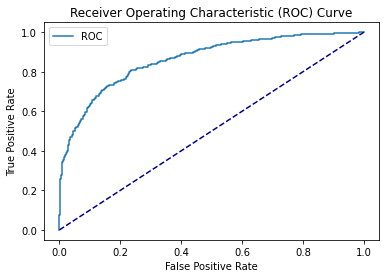

AUC: 0.86


In [139]:
fpr_BAG,tpr_BAG=roc(bagging,X_train,y_train,X_test,y_test)

In [140]:
#Save
filepath = r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2bag_model.pkl'
pickle.dump(bagging, open(filepath, 'wb'))
filepath = r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2bagy_pred_train.pkl'
pickle.dump(y_pred_train, open(filepath, 'wb'))
filepath = r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2bagy_pred.pkl'
pickle.dump(y_pred, open(filepath, 'wb'))

In [141]:
#Save
pickle.dump(fpr_BAG, open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2bag_fpr.pkl', 'wb'))
pickle.dump(tpr_BAG, open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2bag_tpr.pkl', 'wb'))

# Roc curves

In [142]:
#Load the saved fpr and tpr for each algorithm and comparison of the ROC curves for the selection of the best algorithm

loaded_fprTree = pickle.load(open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2tree_fpr.pkl', 'rb'))
loaded_tprTree = pickle.load(open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2tree_tpr.pkl', 'rb'))
loaded_fprRF = pickle.load(open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2rf_fpr.pkl', 'rb'))
loaded_tprRF = pickle.load(open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2rf_tpr.pkl', 'rb'))
loaded_fprMLP = pickle.load(open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2mlp_fpr.pkl', 'rb'))
loaded_tprMLP = pickle.load(open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2mlp_tpr.pkl', 'rb'))
loaded_fprBAG = pickle.load(open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2bag_fpr.pkl', 'rb'))
loaded_tprBAG = pickle.load(open(r'C:/Users/13-U005NL/OneDrive - Politecnico di Milano/inegngneria secondo anno/Machine Learning/Kaggle/Churn/PICKLES/2bag_tpr.pkl', 'rb'))

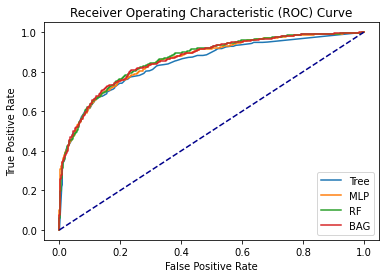

In [143]:
#Plot the different ROC curves

plt.plot(loaded_fprTree, loaded_tprTree, label= "Tree")
plt.plot(loaded_fprMLP, loaded_tprMLP, label= "MLP")
plt.plot(loaded_fprRF, loaded_tprRF, label= "RF")
plt.plot(loaded_fprBAG, loaded_tprBAG, label= "BAG")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
#Choose RF as classification algorithm